<a href="https://www.kaggle.com/code/janmartins/cl-ddos-traffic?scriptVersionId=223273600" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ddos-traffic-dataset/DDoS_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/ddos-traffic-dataset/DDoS_dataset.csv")

In [3]:
df.head()

,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,ARP,UDP,1,192.168.1.1,0,0,60,92.8,1
1,ARP,UDP,0,192.168.1.10,0,0,42,92.9,0
2,ARP,UDP,1,192.168.1.1,0,0,60,362.8,1
3,ARP,UDP,0,192.168.1.12,0,0,42,362.8,0
4,ARP,UDP,1,192.168.1.1,0,0,60,364.3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852585 entries, 0 to 852584
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Highest Layer    852585 non-null  object 
 1   Transport Layer  852585 non-null  object 
 2   Source IP        852585 non-null  int64  
 3   Dest IP          852585 non-null  object 
 4   Source Port      852585 non-null  int64  
 5   Dest Port        852585 non-null  int64  
 6   Packet Length    852585 non-null  int64  
 7   Packets/Time     852585 non-null  float64
 8   target           852585 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 58.5+ MB


In [5]:
df.describe()

,Source IP,Source Port,Dest Port,Packet Length,Packets/Time,target
count,852585.000000,852585.000000,852585.000000,852585.000000,852585.000000,852585.000000
mean,0.466506,48986.260599,4163.623361,770.617703,192.782676,0.466506
std,0.498877,13175.856007,8453.836606,714.423026,143.208412,0.498877
min,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000
25%,0.000000,49158.000000,80.000000,60.000000,28.900000,0.000000
50%,0.000000,49158.000000,5201.000000,342.000000,217.900000,0.000000
75%,1.000000,50890.000000,5201.000000,1514.000000,281.900000,1.000000
max,1.000000,65530.000000,50890.000000,1514.000000,484.400000,1.000000


In [6]:
df.isnull().sum()

Highest Layer      0
Transport Layer    0
Source IP          0
Dest IP            0
Source Port        0
Dest Port          0
Packet Length      0
Packets/Time       0
target             0
dtype: int64

In [7]:
col_obj = []
col_num = []

for col in df.columns:
    if df[col].dtype == 'object':
        col_obj.append(col)
    else :
        col_num.append(col)

In [8]:
col_obj

['Highest Layer', 'Transport Layer', 'Dest IP']

In [9]:
col_num

['Source IP',
 'Source Port',
 'Dest Port',
 'Packet Length',
 'Packets/Time',
 'target']

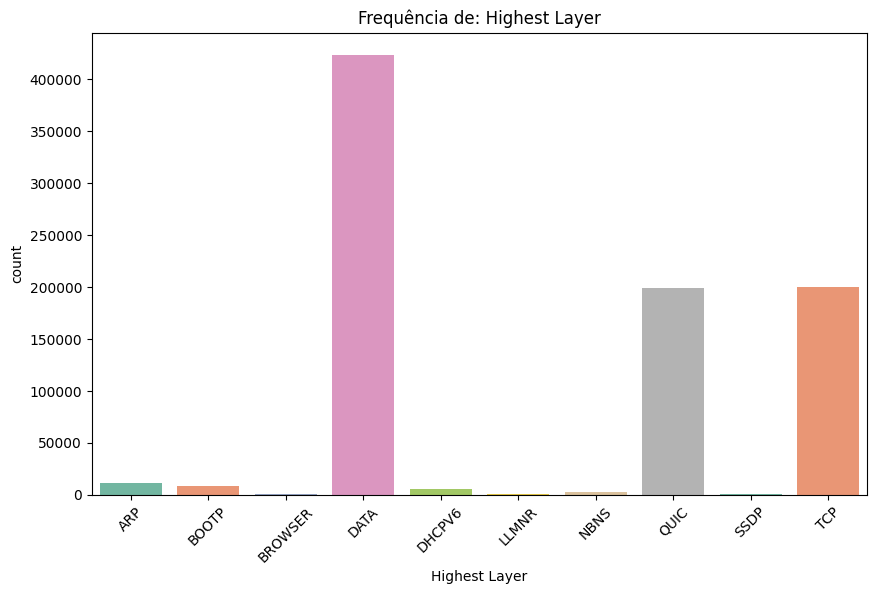

Frequência da coluna Highest Layer:
  Highest Layer  Frequência
0          DATA      423889
1           TCP      200404
2          QUIC      199200
3           ARP       11494
4         BOOTP        8366
5        DHCPV6        5193
6          NBNS        2800
7         LLMNR         572
8       BROWSER         335
9          SSDP         332


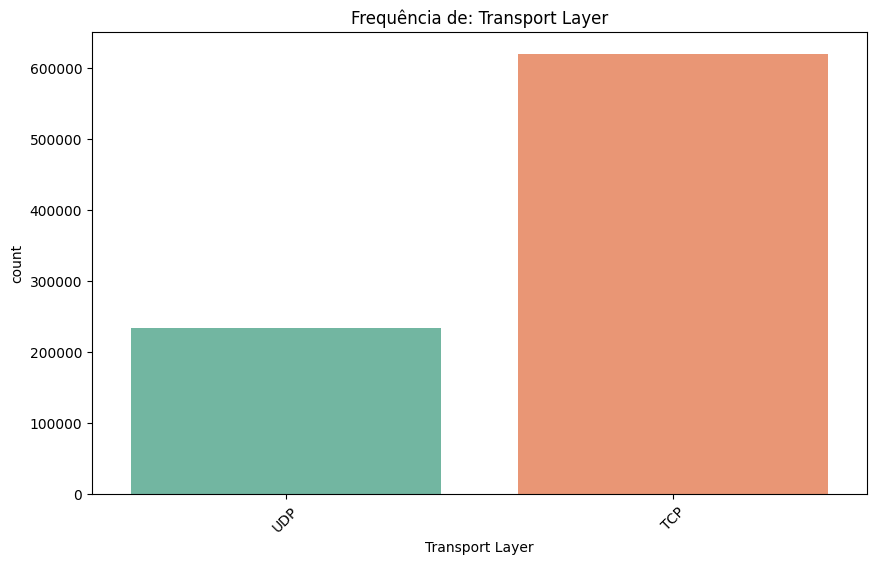

Frequência da coluna Transport Layer:
  Transport Layer  Frequência
0             TCP      619108
1             UDP      233477


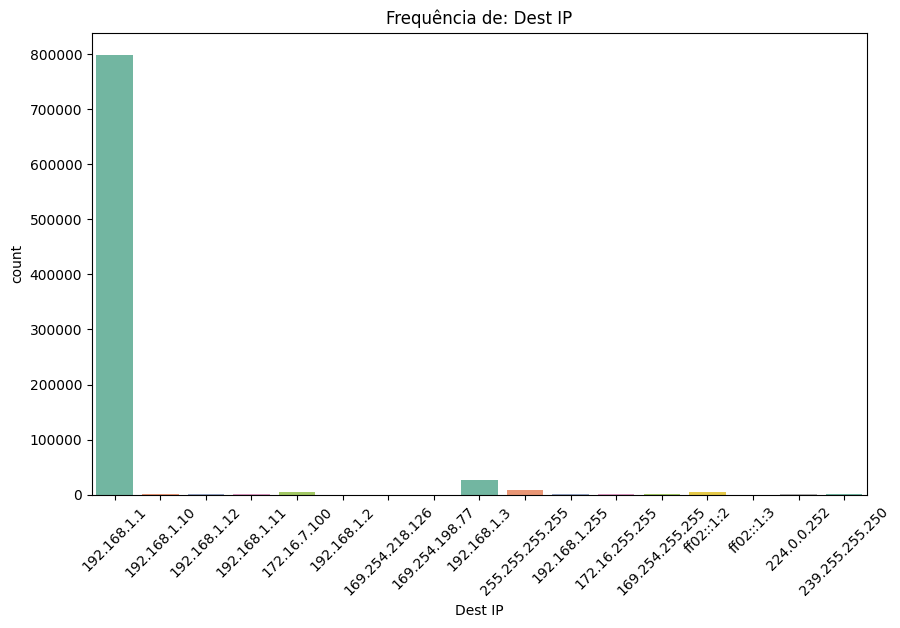

Frequência da coluna Dest IP:
            Dest IP  Frequência
0       192.168.1.1      798758
1       192.168.1.3       26568
2   255.255.255.255        8366
3      172.16.7.100        5574
4         ff02::1:2        5193
5     192.168.1.255        1564
6   169.254.255.255        1563
7    172.16.255.255        1122
8      192.168.1.11        1034
9      192.168.1.12         982
10     192.168.1.10         882
11      224.0.0.252         500
12  239.255.255.250         332
13        ff02::1:3          72
14      192.168.1.2          69
15  169.254.218.126           4
16   169.254.198.77           2


In [10]:
for col in col_obj:
    plt.figure(figsize=(10, 6))
    plt.title(f"Frequência de: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequência")
    sns.countplot(data=df, x=col, palette="Set2")
    plt.xticks(rotation=45)
    plt.show()  # Exibe o gráfico
    # Conta a frequência dos valores na coluna
    qtd = df[col].value_counts().reset_index(name='Frequência')
    qtd.columns = [col, 'Frequência']
    # Imprime as frequências
    print(f'Frequência da coluna {col}:')
    print(qtd)

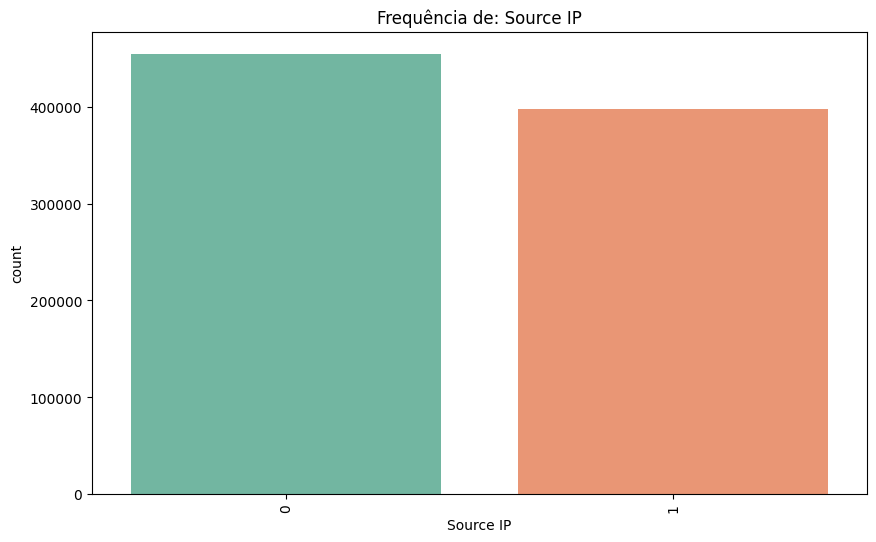

Frequência da coluna Source IP:
   Source IP  Frequência
0          0      454849
1          1      397736


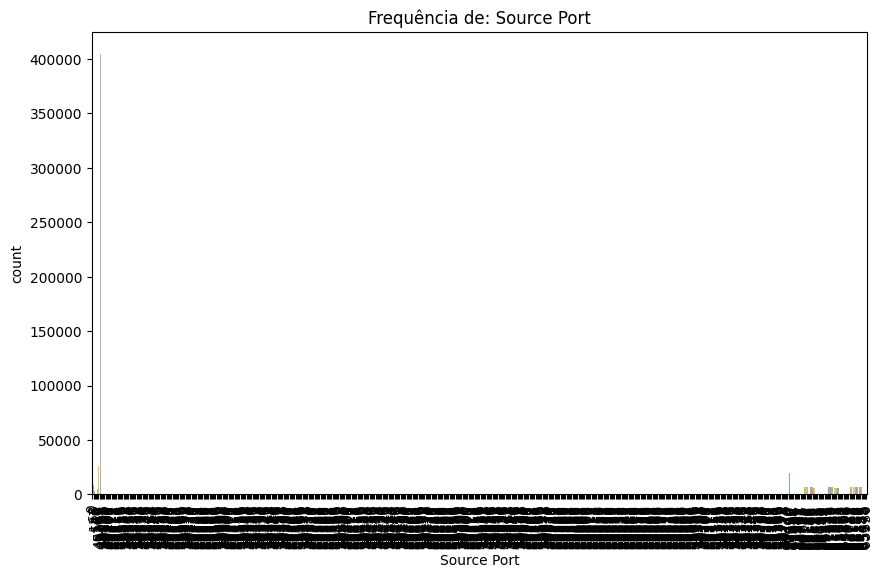

Frequência da coluna Source Port:
     Source Port  Frequência
0          49158      404163
1           5201       26577
2          50890       19550
3              0       11494
4             68        8366
..           ...         ...
644        50468           6
645        53541           6
646        52107           4
647        58136           4
648        56614           4

[649 rows x 2 columns]


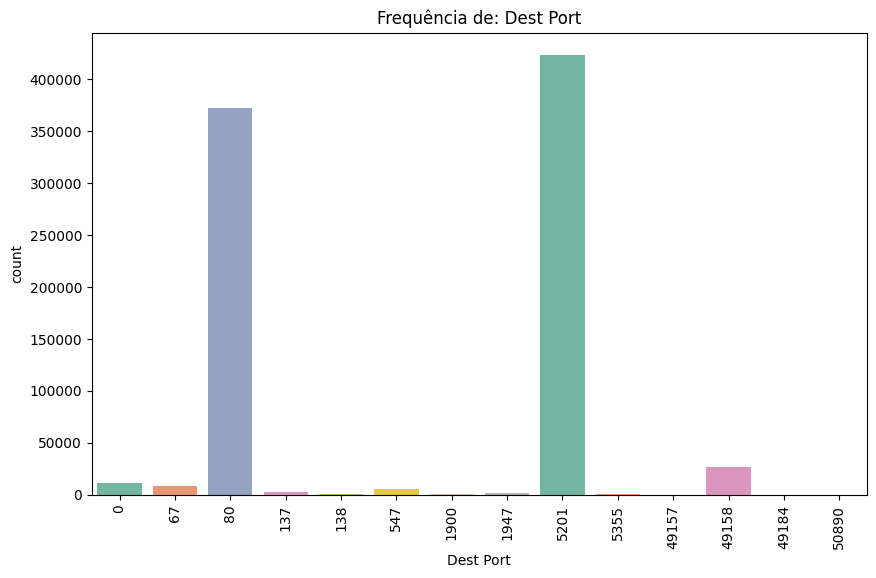

Frequência da coluna Dest Port:
    Dest Port  Frequência
0        5201      423746
1          80      372052
2       49158       26542
3           0       11494
4          67        8366
5         547        5193
6         137        2800
7        1947        1118
8        5355         572
9         138         335
10       1900         332
11      49157          22
12      49184          12
13      50890           1


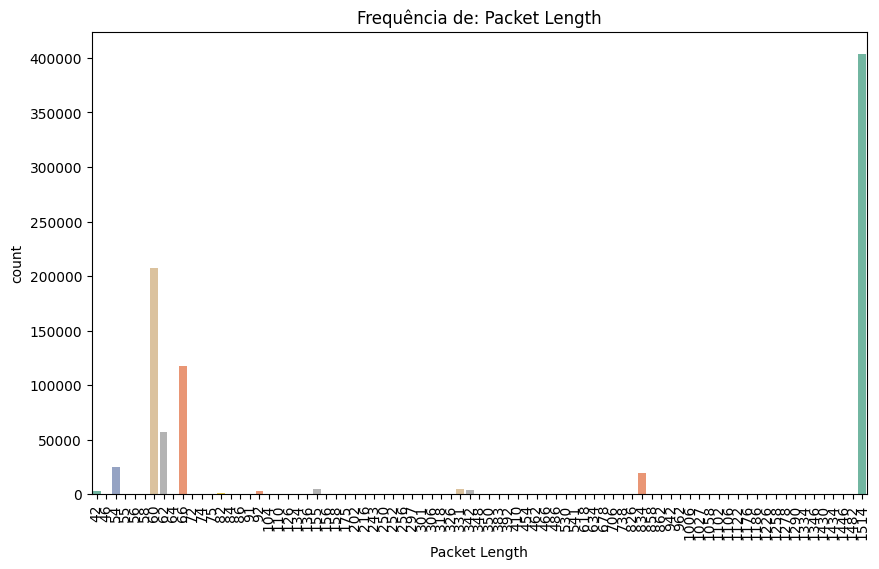

Frequência da coluna Packet Length:
    Packet Length  Frequência
0            1514      403341
1              60      207761
2              66      117290
3              62       57048
4              54       25131
..            ...         ...
76           1226           1
77            738           1
78            454           1
79            634           1
80             46           1

[81 rows x 2 columns]


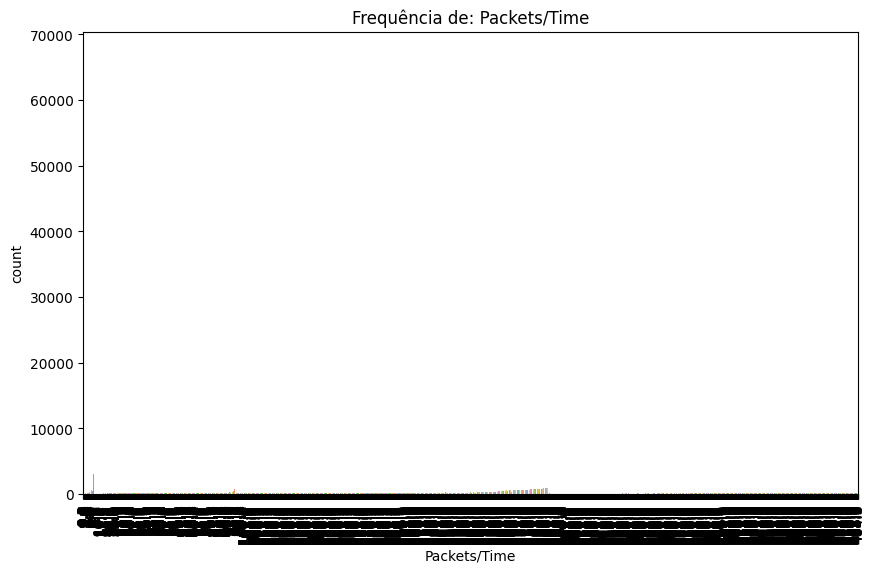

Frequência da coluna Packets/Time:
      Packets/Time  Frequência
0              7.4       67022
1              7.0       36542
2              7.1       21940
3              7.5       20528
4              7.3        8516
...            ...         ...
4838           0.8           1
4839           0.9           1
4840           1.1           1
4841           0.1           1
4842           0.2           1

[4843 rows x 2 columns]


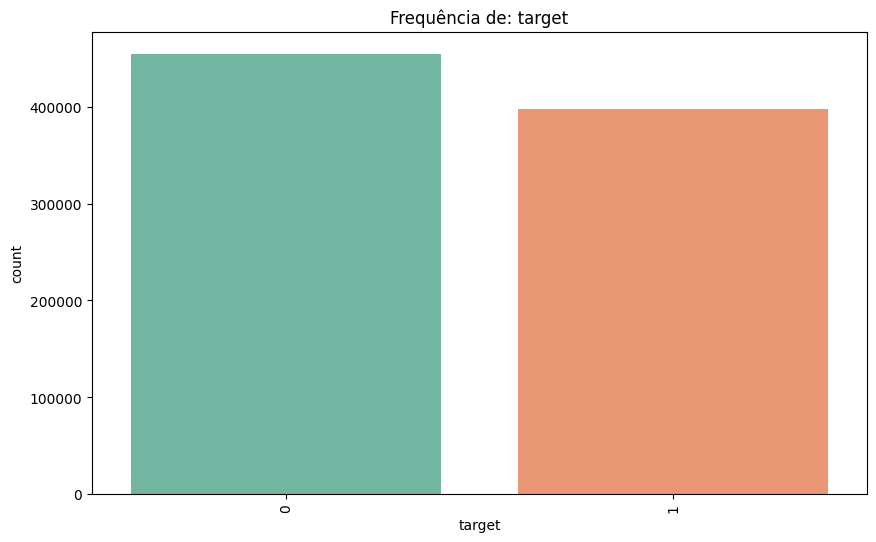

Frequência da coluna target:
   target  Frequência
0       0      454849
1       1      397736


In [11]:
for col in col_num:
    plt.figure(figsize=(10, 6))
    plt.title(f"Frequência de: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequência")
    sns.countplot(data=df, x=col, palette="Set2")  # Use uma paleta válida, como "Set2"
    plt.xticks(rotation=90)
    plt.show()  # Exibe o gráfico
    # Conta a frequência dos valores na coluna
    qtd = df[col].value_counts().reset_index(name='Frequência')
    qtd.columns = [col, 'Frequência']
    # Imprime as frequências
    print(f'Frequência da coluna {col}:')
    print(qtd)

# ML

In [12]:
# Aplicando One-Hot Encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded)

        Source IP  Source Port  Dest Port  Packet Length  Packets/Time  \
0               1            0          0             60          92.8   
1               0            0          0             42          92.9   
2               1            0          0             60         362.8   
3               0            0          0             42         362.8   
4               1            0          0             60         364.3   
...           ...          ...        ...            ...           ...   
852580          0        50890       5201            834          19.3   
852581          0        50890       5201            834          19.8   
852582          0        50890       5201            834          20.3   
852583          0        50890       5201            834          20.8   
852584          0        50890       5201            834          21.4   

        target  Highest Layer_BOOTP  Highest Layer_BROWSER  \
0            1                False              

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

In [14]:
# Separando variáveis independentes (X) e variável dependente (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [15]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest

In [16]:
# Inicializando e treinando o modelo RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação do modelo:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.0
Relatório de Classificação do modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90785
           1       1.00      1.00      1.00     79732

    accuracy                           1.00    170517
   macro avg       1.00      1.00      1.00    170517
weighted avg       1.00      1.00      1.00    170517



In [18]:
# Como atingimos 100% pode ser um sinal de Overfitting, vamos verificar

scores = cross_val_score(model, X, y, cv=30)
print(f"Acurácia média da validação cruzada: {scores.mean()}")

Acurácia média da validação cruzada: 0.999962467745719


In [19]:
print(confusion_matrix(y_test, y_pred))

[[90785     0]
 [    0 79732]]


# Decision Tree

In [20]:
# Inicializando e treinando o modelo Decision Tree
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# Fazendo previsões
y_pred = model_dtc.predict(X_test)

# Avaliando o modelo
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação do modelo:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.0
Relatório de Classificação do modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90785
           1       1.00      1.00      1.00     79732

    accuracy                           1.00    170517
   macro avg       1.00      1.00      1.00    170517
weighted avg       1.00      1.00      1.00    170517



In [22]:
# Como atingimos 100% pode ser um sinal de Overfitting, vamos verificar

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=30)
print(f"Acurácia média da validação cruzada: {scores.mean()}")

Acurácia média da validação cruzada: 1.0
